In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import networkx as nx

import JargoInstanceHelper as jih

# Visualizing the City using Matplotlib

In [2]:
path_rnet = "./Manhattan/mny.rnet"
edges = pd.read_csv(path_rnet,
                    sep=' ',
                    names=['ID_edge',
                          'from_ID',
                          'to_ID',
                          'from_x',
                          'from_y',
                          'to_x',
                          'to_y'])
edges

,ID_edge,from_ID,to_ID,from_x,from_y,to_x,to_y
0,0,1,2,-73.978969,40.783390,-73.979568,40.783650
1,1,2,1,-73.979568,40.783650,-73.978969,40.783390
2,2,3,4,-73.991688,40.738045,-73.991019,40.737764
3,3,4,3,-73.991019,40.737764,-73.991688,40.738045
4,4,5,6,-73.931611,40.800105,-73.931214,40.799478
...,...,...,...,...,...,...,...
31439,31439,12087,5826,-74.002284,40.743017,-74.001587,40.742735
31440,31440,1407,12318,-73.974540,40.746211,-73.973978,40.746062
31441,31441,12318,1407,-73.973978,40.746062,-73.974540,40.746211
31442,31442,12060,11570,-73.936115,40.797205,-73.935504,40.796956


In [3]:
nodes_from=edges[['from_ID','from_x','from_y']]
nodes_from.columns=['id','x','y']
nodes_to=edges[['to_ID','to_x','to_y']]
nodes_to.columns=['id','x','y']
nodes=pd.concat([nodes_from,nodes_to],ignore_index=True)
#filter out duplicates (i.e where the ID, x and y coord are all the same)
nodes=nodes.drop_duplicates(subset=['id','x','y'])
nodes.set_index('id',inplace=True)
nodes

,x,y
id,,
1,-73.978969,40.783390
2,-73.979568,40.783650
3,-73.991688,40.738045
4,-73.991019,40.737764
5,-73.931611,40.800105
...,...,...
12316,-73.986592,40.773109
12317,-73.913304,40.876437
12318,-73.973978,40.746062


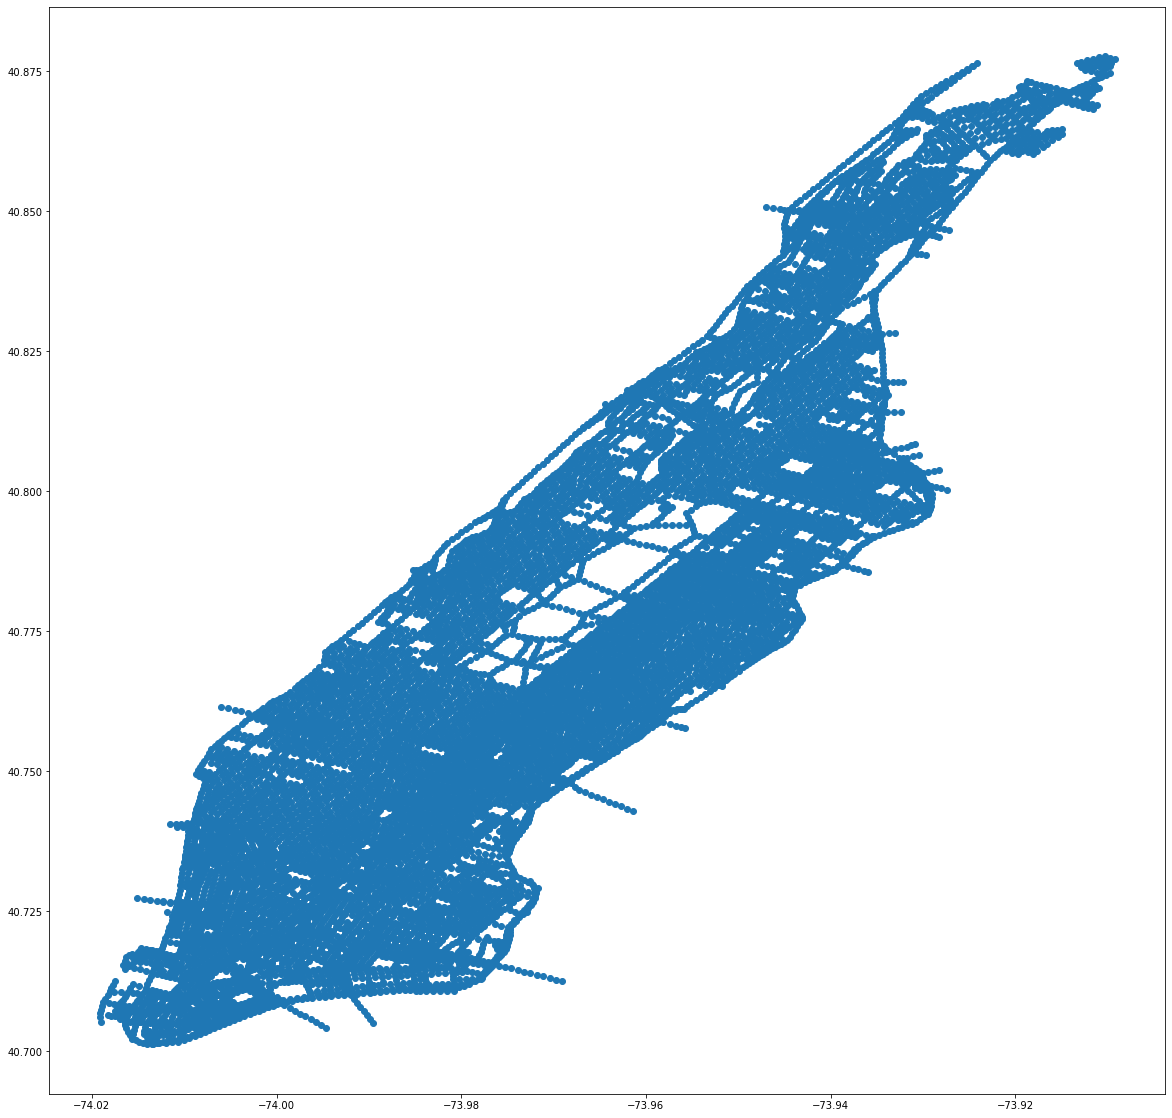

In [4]:
plt.figure(figsize=(20,20))
plt.scatter(nodes.x,nodes.y)
plt.show()

# Visualizing a path/route

In [6]:
route = [5,100,1000,10000,12300]

route_nodes = nodes.loc[route]
route_nodes

,x,y
id,,
5,-73.931611,40.800105
100,-73.939159,40.847286
1000,-73.978853,40.757703
10000,-73.991317,40.770554
12300,-73.963467,40.806157


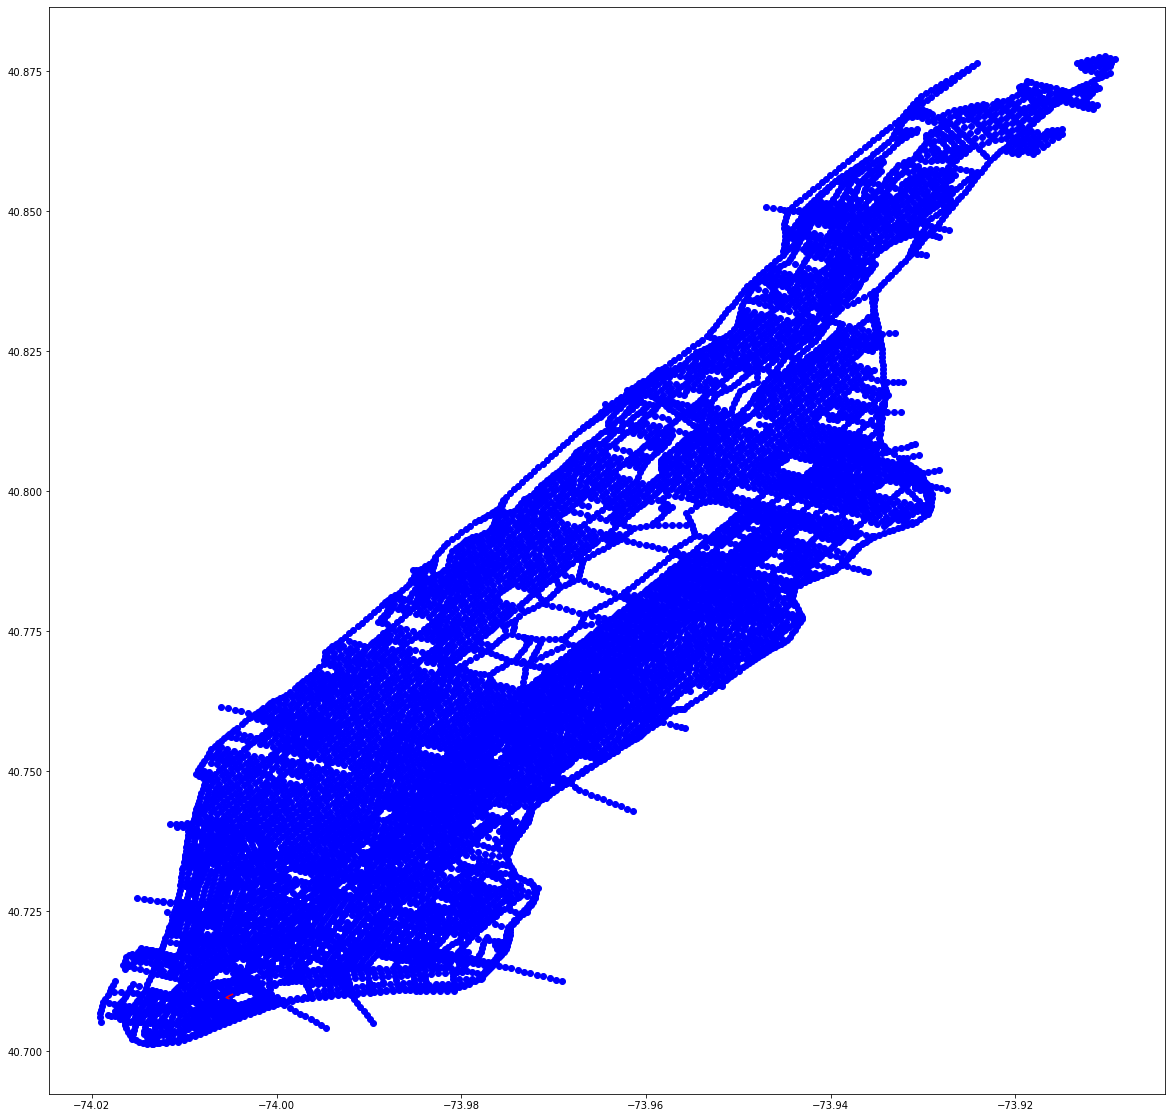

In [7]:
route = [3067,1221,1971,8610]


route_nodes = nodes.loc[route]
plt.figure(figsize=(20,20))
plt.scatter(nodes.x,nodes.y,c='b')
plt.plot(route_nodes.x,route_nodes.y,c='r')
plt.show()